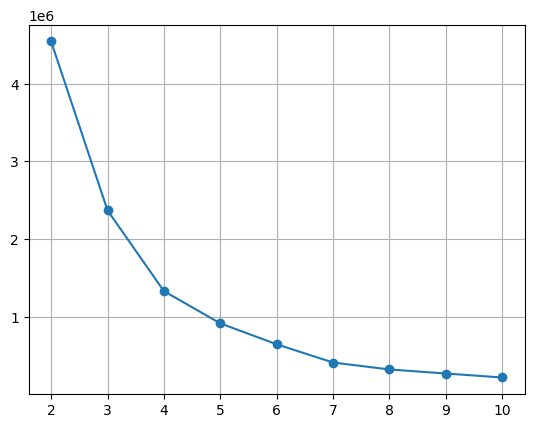

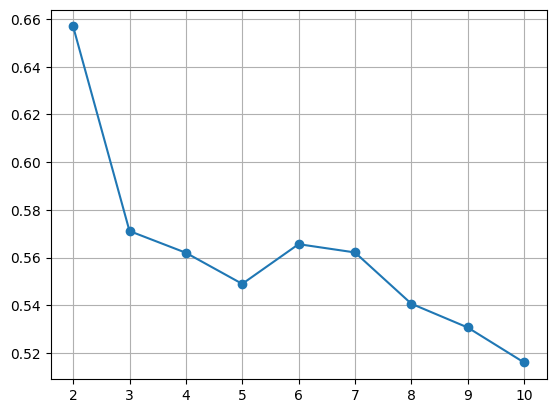

KMeans
Time used:  0.022996187210083008
2    47
0    62
1    69
Name: Cluster, dtype: int64


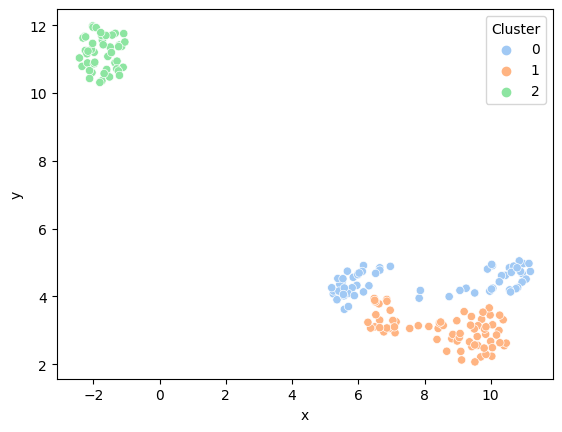

Agglomerative Clustering
Time used:  0.0010008811950683594
0    48
2    58
1    72
Name: Cluster, dtype: int64


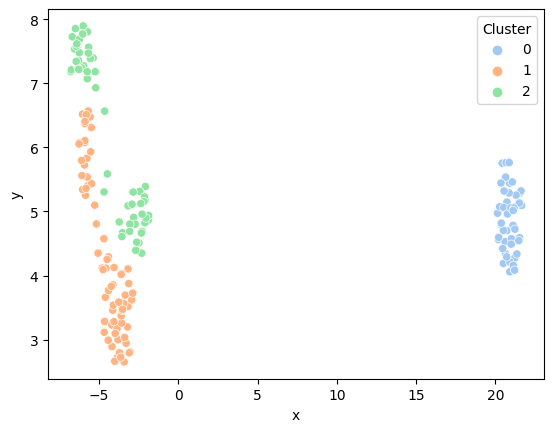

DBSCAN
Time used:  0.0019998550415039062
-1    132
 1      5
 0      5
 2      8
 4     10
 3      6
 5      6
 6      6
Name: Cluster, dtype: int64


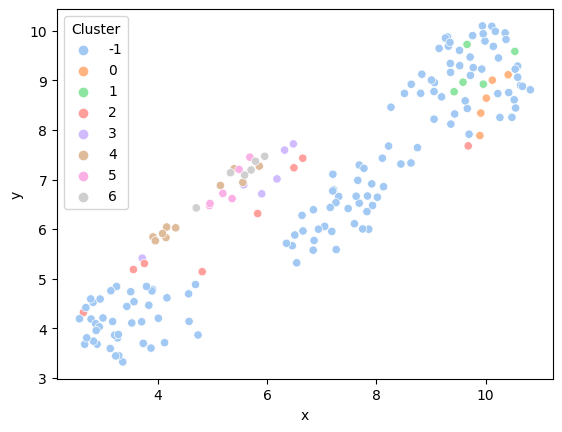

In [79]:
import time
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import umap
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

def two(df, scale):
    models = []
    score1 = []
    score2 = []
    for i in range(2,11):
        model = KMeans(n_clusters=i, random_state=27, init='k-means++').fit(df)
        models.append(model)
        score1.append(model.inertia_)
        score2.append(silhouette_score(df,model.labels_))
    plt.grid()
    plt.plot(np.arange(2,11), score1, marker='o')
    plt.show()
    plt.grid()
    plt.plot(np.arange(2,11), score2, marker='o')
    plt.show()
    time_start = time.time()
    model1 = KMeans(n_clusters=3, random_state=27, init='k-means++').fit(df)
    print("KMeans\nTime used: ", time.time() - time_start)
    df['Cluster'] = model1.labels_
    print(df['Cluster'].value_counts(sort=False))
    #fig = go.Figure(data=[go.Scatter3d(x=df['math score'],y=df['reading score'],z=df['writing score'],
    #                                   mode='markers', marker_color=df['Cluster'], marker_size = 3)])
    #fig.show()
    scaled = pd.DataFrame(scale.fit_transform(df), columns=df.columns)
    um = umap.UMAP(n_neighbors=50, min_dist=0.1, random_state=27).fit_transform(scaled)
    DATA = scaled.copy()
    DATA['x']=um[:,0]
    DATA['y']=um[:,1]
    sns.scatterplot(x='x',y='y',hue=df['Cluster'],data=DATA,palette='pastel')
    plt.show()

def three(df, scale):
    time_start = time.time()
    model2 = AgglomerativeClustering(3, compute_distances=True).fit(df)
    print("Agglomerative Clustering\nTime used: ", time.time() - time_start)
    df['Cluster'] = model2.labels_
    print(df['Cluster'].value_counts(sort=False))
    scaled = pd.DataFrame(scale.fit_transform(df), columns=df.columns)
    um = umap.UMAP(n_neighbors=50, min_dist=0.1, random_state=27).fit_transform(scaled)
    DATA = scaled.copy()
    DATA['x']=um[:,0]
    DATA['y']=um[:,1]
    sns.scatterplot(x='x',y='y',hue=df['Cluster'],data=DATA,palette='pastel')
    plt.show()

def four(df, scale):
    time_start = time.time()
    model3 = DBSCAN(eps=11, min_samples=5).fit(df)
    print("DBSCAN\nTime used: ", time.time() - time_start)
    df['Cluster'] = model3.labels_
    print(df['Cluster'].value_counts(sort=False))
    scaled = pd.DataFrame(scale.fit_transform(df), columns=df.columns)
    um = umap.UMAP(n_neighbors=50, min_dist=0.1, random_state=27).fit_transform(scaled)
    DATA = scaled.copy()
    DATA['x']=um[:,0]
    DATA['y']=um[:,1]
    sns.scatterplot(x='x',y='y',hue=df['Cluster'],data=DATA,palette='pastel')
    plt.show()

if __name__ == '__main__':
    """
    data = pd.read_csv('exams.csv')
    data['parental level of education'].replace({'some high school':1, 'high school':2, 'some college':3,
                                                 "bachelor's degree":4, "associate's degree":5, "master's degree":6},
                                                inplace=True)
    data['test preparation course'].replace({'completed':1, 'none':0}, inplace=True)
    data['race/ethnicity'].replace({'group A':1, 'group B':2, 'group C':3, 'group D':4, 'group E':5}, inplace=True)
    data.gender.replace({'male':1, 'female':0}, inplace=True)
    data.lunch.replace({'standard':1, 'free/reduced':0}, inplace=True)
    #data.drop('test preparation course', axis=1, inplace=True)
    #data.drop('gender', axis=1, inplace=True)
    #data.drop('parental level of education', axis=1, inplace=True)
    #data.drop('race/ethnicity', axis=1, inplace=True)
    """
    data = load_wine(as_frame=True)
    #print(data.describe())
    scaler = preprocessing.MinMaxScaler()
    two(data.data, scaler)
    three(data.data, scaler)
    four(data.data, scaler)